In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

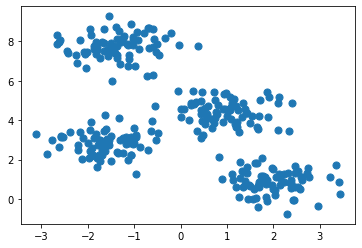

In [2]:
# from dataset generate blobs for clustring 
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60,  random_state=0)
plt.scatter(X[:,0], X[:,1], s=50)
#n_featuresint, default=2 means that X has two columns or two features

In [3]:
from sklearn.cluster import KMeans
kmeans= KMeans(n_clusters= 4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

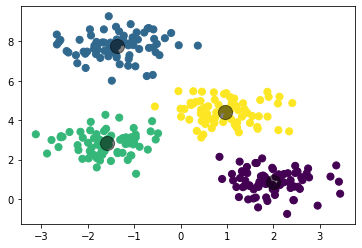

In [4]:
from sklearn.metrics import pairwise_distances_argmin  

def find_clusters(X, n_clusters, rseed= 2):
  #randomly choose clusters
    rng = np.random.RandomState(rseed)
    i= rng.permutation(X.shape[0])[:n_clusters]
    centers =X[i]
    while True: #inifinte loop, it will blreak if the new centers is equal to the  random centers 
        #assign labels based on closes center
        labels =  pairwise_distances_argmin  (X, centers)
        #find new centers from means of points 
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])
        if np.all(centers==new_centers):
            break
        centers = new_centers
    return centers, labels
centers, labels= find_clusters(X,4)
plt.scatter(X[:,0], X[:,1], c =y_kmeans, s= 50 ,cmap='viridis')

plt.scatter(centers[:,0], centers[:,1], c= 'black', s=200, alpha=0.5);
        

(427, 640, 3)

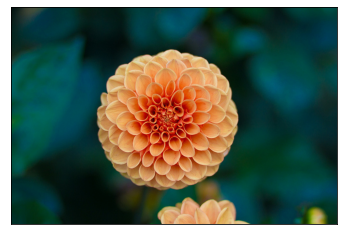

In [5]:
from sklearn.datasets import load_sample_image
china = load_sample_image('flower.jpg')
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china)
#return the dimension of array
china.shape
#china

In [6]:
#reshape the data to n_samples n_features and rescale the color so the lie between 0 and 1
data = china/255.0 #' use 0, 1 scale '
data 
data= data.reshape(427*640, 3)# 427*640 rows and 3 columns
data.shape
data 
data.shape

(273280, 3)

10000
[[0.91764706 0.77647059 0.57254902]
 [0.         0.03921569 0.01568627]
 [0.92941176 0.56470588 0.29019608]
 ...
 [0.00392157 0.16078431 0.15686275]
 [0.01568627 0.16862745 0.19607843]
 [0.04705882 0.09411765 0.03921569]]
10000 10000 10000
[0.91764706 0.         0.92941176 ... 0.00392157 0.01568627 0.04705882] [0.77647059 0.03921569 0.56470588 ... 0.16078431 0.16862745 0.09411765] [0.57254902 0.01568627 0.29019608 ... 0.15686275 0.19607843 0.03921569]
[[0.0120876  0.07046833 0.04822053]
 [0.0120876  0.07046833 0.04822053]
 [0.0120876  0.07046833 0.04822053]
 ...
 [0.0331554  0.1373851  0.0988069 ]
 [0.0331554  0.1373851  0.0988069 ]
 [0.0331554  0.1373851  0.0988069 ]]


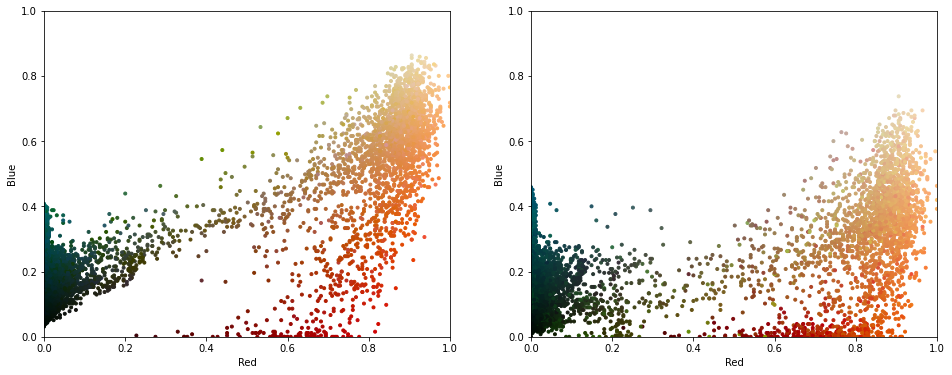

In [13]:
#visulize these pixels in this color space, using a subset of 10,000 for efficiency
def plot_pixel(data, title, colors=None, N=10000):
    if colors is None:
        colors=data


#choose a random subset
        rng=np.random.RandomState(0)
        i= rng.permutation(data.shape[0])[:N]
        print(len(i))
        colors= colors[i]
        R, G, B = data[i].T
        print(colors)
        print(len(R),len(G),len(B))
        print(R,G,B)
#
        fig, ax= plt.subplots(1, 2, figsize=(16,6))
        ax[0].scatter(R,G , color=colors, marker = '.')
        ax[0].set(xlabel= 'Red', ylabel= 'Blue', xlim = (0,1), ylim =(0,1))

        ax[1].scatter(R,B , color=colors, marker = '.')
        ax[1].set(xlabel= 'Red', ylabel= 'Blue', xlim = (0,1), ylim =(0,1))

        #fig.subtitle(title, size=20)

plot_pixel(data, title ='Input color space:16 million possible colors')

[[0.01465381 0.07896155 0.0560335 ]
 [0.01465381 0.07896155 0.0560335 ]
 [0.01465381 0.07896155 0.0560335 ]
 ...
 [0.03016192 0.15757265 0.11226279]
 [0.03016192 0.15757265 0.11226279]
 [0.03016192 0.15757265 0.11226279]]


Text(0.5, 1.0, '16 color image')

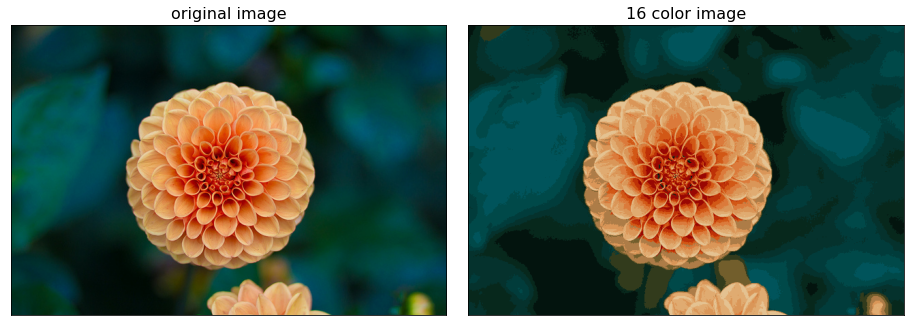

In [18]:
#fix numpy issue 
import warnings
warnings.simplefilter('ignore')
#reducing this 16 million colors to 16 colors 
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]
print(new_colors)

plot_pixel(data, colors = new_colors, title ='Reduced to 16 colors')
china_recolored = new_colors.reshape(china.shape)
fig, ax = plt.subplots(1,2, figsize=(16,6), subplot_kw = dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('original image', size =16)
ax[1].imshow(china_recolored)
ax[1].set_title('16 color image', size=16)